## Загрузка пакетов

In [234]:
from importlib import reload
import torch
import torch.nn as nn
import dataset
reload(dataset)
import supernet
reload(supernet)
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Загрузка датасета MNIST с помощью файла dataset

In [235]:
dataset_train, dataset_valid = dataset.get_dataset()

batch_size = 100 
train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size,shuffle=True) 
test_loader = DataLoader(dataset=dataset_valid, batch_size=batch_size, shuffle=False)

## Создание экземпряла supernet (класс описан в файле supernet)

In [236]:
supernet = supernet.SuperNet()

## Обучение сети целиком

In [237]:
supernet.weights_init()
loss_list, acc_list = supernet.train(train_loader, num_epochs=1)

Epoch [1/1], Step [200/600], Loss: 2.0993, Accuracy: 38.00%
Epoch [1/1], Step [400/600], Loss: 1.8689, Accuracy: 43.00%
Epoch [1/1], Step [600/600], Loss: 1.7335, Accuracy: 53.00%


### Валидация

In [241]:
supernet.validate_sample((1, 1), test_loader)

#torch.save(model.state_dict(), 'checkpoints\conv_net_model.ckpt')

Test Accuracy of the model on the 10000 test images: 46.0 %


## Обучение сети по отдельным экземплярам

## Графики

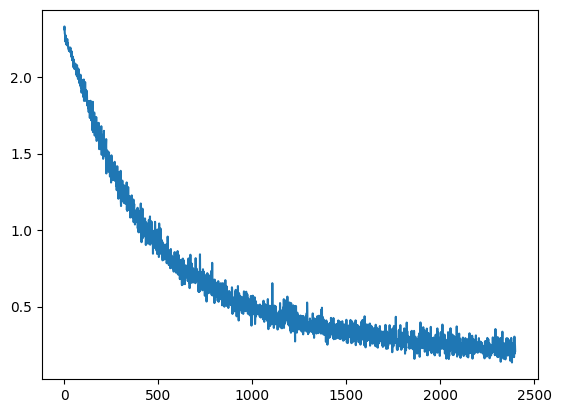

In [110]:
plt.plot(range(len(loss_list)), loss_list)

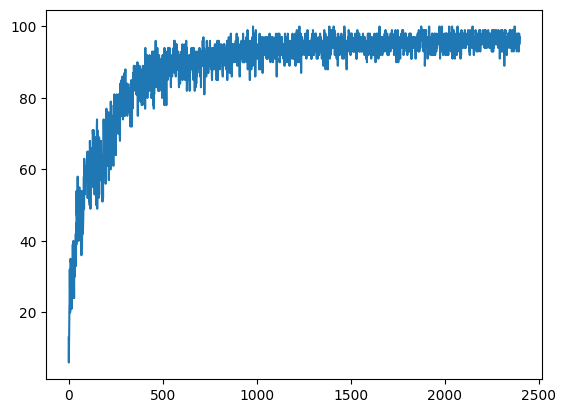

In [111]:
acc_list = [x * 100 for x in acc_list]
plt.plot(range(len(acc_list)), acc_list)